##### <font color='pink'> *Rozpoznawanie obrazów (2024)* </font>


## LAB 4: Pliki graficzne RGB

<font color='orange'> Prowadząca: dr inż. Urszula Libal </font>

 ---

## 1. Obrazek w odcieniach szarości


<div class="alert-success">
<br>  
    <font size = "+1"><b>Obrazek w odcieniach szarości</b></font>
<br>
<br>

    
Obrazek w zapisany w odcieniach szarości składa się z pixeli zakodowanych wartościami całkowitymi od **0 (kolor czarny)** do **255 (kolor biały)**.
    
<img src="OpenCVHistogram.png" alt="ilustracja" style="width: 300px;"/>


<br>    
</div>

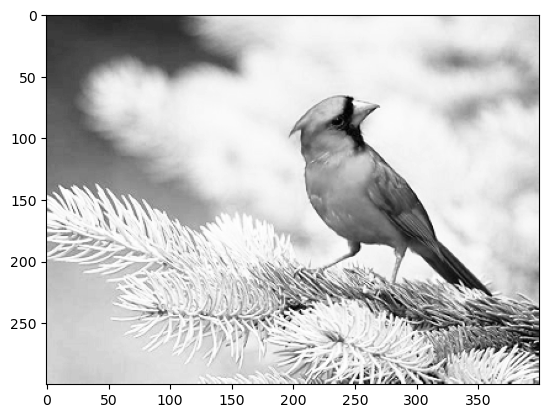

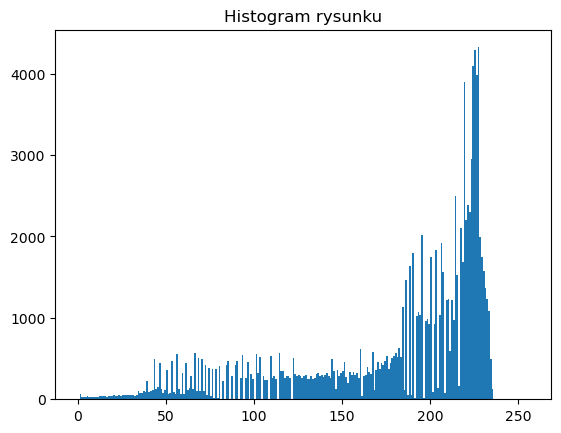

In [1]:
import cv2 
from matplotlib import pyplot as plt 


img = cv2.imread('rysBW.png',0) 
plt.figure(1)
plt.imshow(img, cmap='gray')
  
# histogram of an image 
plt.figure(2)
plt.hist(img.ravel(),256,[0,256]) # img.ravel() - returns flattened array
plt.title('Histogram rysunku')
plt.show()


In [2]:
# ----------------------------------------------------------------------
# ZAD. Dlaczego na histogramie jest więcej wartości bliższych 255 niż 0?
# ----------------------------------------------------------------------

## 1.2. Wygenerowanie pliku z losowym tłem (kaszka w odcieniach szarości)

Type: <class 'numpy.ndarray'>
dtype: int64
shape: (500, 500)


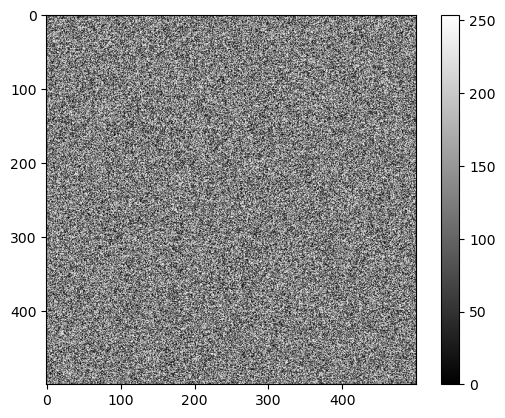

In [3]:
# Wygenerowanie pliku z losowym tłem  (macierz 500x500)

import numpy as np
from matplotlib import pyplot as plt

# Wygeneruj macierz rozmiaru 500x500 z liczbami typu int od 0 do 255
random_image_1D = np.random.randint(0, 255, size=[500, 500], dtype=int)
plt.imshow(random_image_1D, cmap='gray') # od 0-czarnego do 255-białego
plt.colorbar();

print('Type:', type(random_image_1D))
print('dtype:', random_image_1D.dtype)
print('shape:', random_image_1D.shape)


 ---

## 2. Obrazek w kolorach RGB

## 2.1. Wygenerowanie pliku z losowym tłem (kaszka RGB)

Type: <class 'numpy.ndarray'>
dtype: int64
shape: (500, 500, 3)


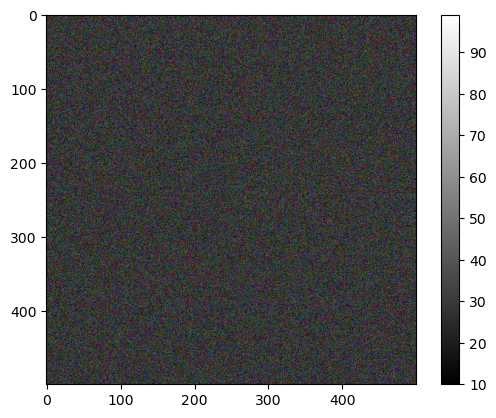

In [4]:
# Wygenerowanie pliku z losowym tłem (macierz 500x500x3)

import numpy as np
from matplotlib import pyplot as plt

random_image = np.random.randint(10, 100, size=[500, 500, 3], dtype=int)

plt.imshow(random_image, cmap='gray')
plt.colorbar();

print('Type:', type(random_image))
print('dtype:', random_image.dtype)
print('shape:', random_image.shape)

## 2.2. Dodajemy kwadraciki RGB

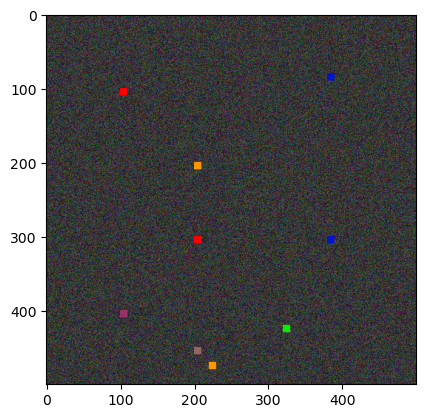

In [5]:
# Dodajemy kwadraciki 10x10 o określonych kolorach [R,G,B]

random_image[100:110, 100:110, :] = [255, 0, 0]
random_image[300:310, 200:210, :] = [255, 0, 0]
random_image[200:210, 200:210, :] = [255, 150, 0]
random_image[300:310, 380:390, :] = [0, 20, 200]
random_image[400:410, 100:110, :] = [150, 50, 100]
random_image[450:460, 200:210, :] = [150, 100, 100]
random_image[470:480, 220:230, :] = [255, 150, 0]
random_image[ 80: 90, 380:390, :] = [0, 20, 200]
random_image[ 80: 90, 380:390, :] = [0, 20, 200]
random_image[420:430, 320:330, :] = [0, 240, 0]

plt.imshow(random_image);


In [8]:
# Zapis obrazka do pliku

import matplotlib.image as mpimg

random_image = random_image.astype(np.uint8)
mpimg.imsave('random_dots.png', random_image)


## 2.3. Histogramy obrazka RGB

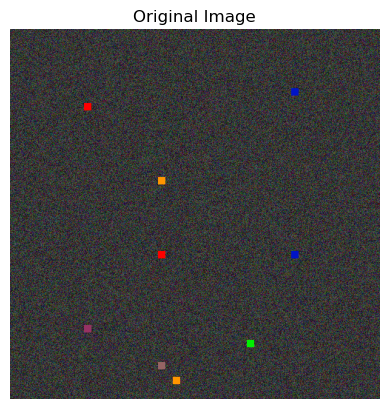

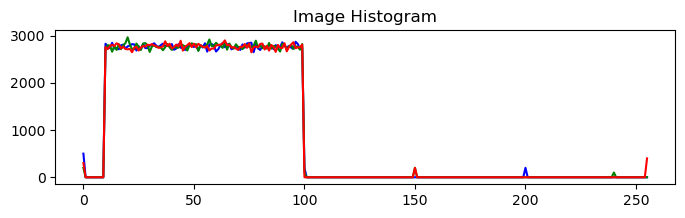

In [12]:
# Rysujemy histogramy dla RGB

import cv2 
import matplotlib.pyplot as plt 


# load image 
imageObj = cv2.imread('random_dots.png') 
#When we read the image using cv2.imread() method, the image read is in BGR format


# to avoid grid lines 
plt.axis("off") 
plt.title("Original Image") 
plt.imshow(cv2.cvtColor(imageObj, cv2.COLOR_BGR2RGB)) #from bgr to rgb
plt.show() 

# Get BGR data from image 
blue_color = cv2.calcHist([imageObj], [0], None, [256], [0, 256]) 
green_color = cv2.calcHist([imageObj], [1], None, [256], [0, 256]) 
red_color = cv2.calcHist([imageObj], [2], None, [256], [0, 256]) 


plt.figure(num=None, figsize=(8, 2))
plt.plot(blue_color, color='b') 
plt.plot(green_color, color='g') 
plt.plot(red_color, color='r') 
plt.title('Image Histogram') 
plt.show()


In [ ]:
# ----------------------------------------------------------------------
# ZAD. Przeanalizuj histogramy i sprawdź: 
# 
# (a) Czy kwadraciki mogą być wykrywalne za pomocą histogramów?
# 
# (b) Dlaczego dla wartości od 10 do 100 mamy aż tak wiele pixeli? 
# Która komenda za to odpowiada?
# 
# (c) Zmień tę odpowiedzialną komendę tak, 
# aby losować wartości od 0 do 255 dla tła obrazka. 
# Powtórz procedurę generowania tła oraz kwadracików,
# a następnie przeanalizuj histogramy jeszcze raz.
# ----------------------------------------------------------------------

 ---

## 3. Transformacje obrazka RGB

## 3.1. Rozbicie obrazka na kolory RGB

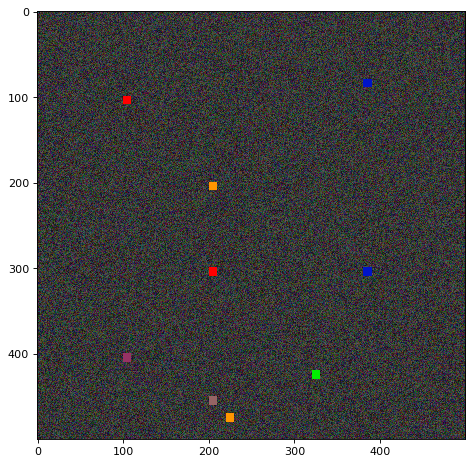

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imshow, imread
from skimage.color import rgb2hsv, hsv2rgb
import cv2

im = imread('random_dots.png')
plt.figure(num=None, figsize=(6, 6), dpi=80)
imshow(im);

In [40]:
# Mediana kolorów RGB

median_r = np.median(im[:,:,0])
median_g = np.median(im[:,:,1])
median_b = np.median(im[:,:,2])

print('Mediana (RGB) =',(median_r, median_g, median_b))


# Średnia kolorów RGB

mean_r = np.mean(im[:,:,0])
mean_g = np.mean(im[:,:,1])
mean_b = np.mean(im[:,:,2])

print('Mean (RGB) =',(mean_r, mean_g, mean_b))


Mediana (RGB) = (55.0, 55.0, 54.0)
Mean (RGB) = (54.835164, 54.615856, 54.527236)


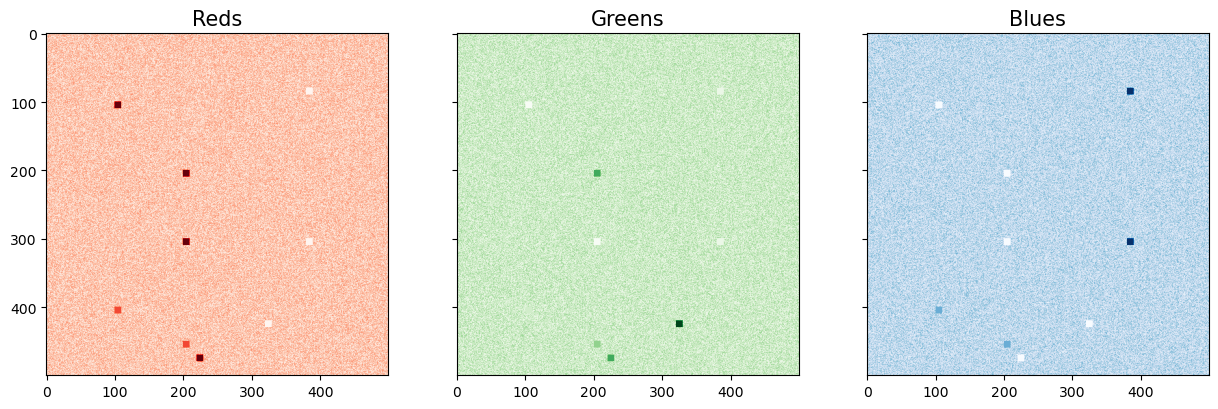

In [15]:
def rgb_splitter(image):
    rgb_list = ['Reds','Greens','Blues']
    fig, ax = plt.subplots(1, 3, figsize=(15,5), sharey = True)
    for i in range(3):
        ax[i].imshow(image[:,:,i], cmap = rgb_list[i])
        ax[i].set_title(rgb_list[i], fontsize = 15)
                
rgb_splitter(im)

## 3.2. Filtracja wybranego koloru

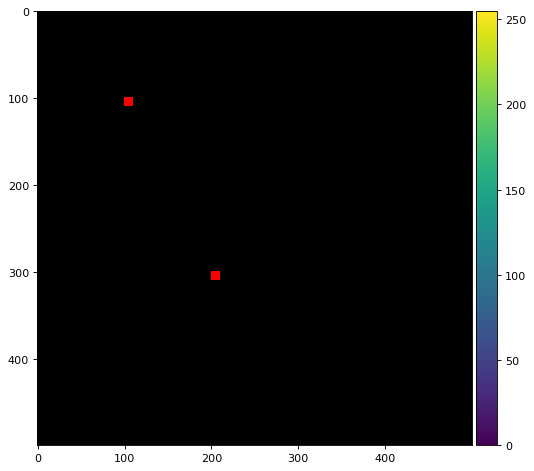

In [17]:
# Odfiltrowanie tylko czerwonego koloru

red_filtered = (im[:,:,0] > 150) & (im[:,:,1] < 100) & (im[:,:,2] < 110)
plt.figure(num=None, figsize=(8, 6), dpi=80)
im_new = im.copy()
im_new[:, :, 0] = im_new[:, :, 0] * red_filtered
im_new[:, :, 1] = im_new[:, :, 1] * red_filtered
im_new[:, :, 2] = im_new[:, :, 2] * red_filtered
imshow(im_new);

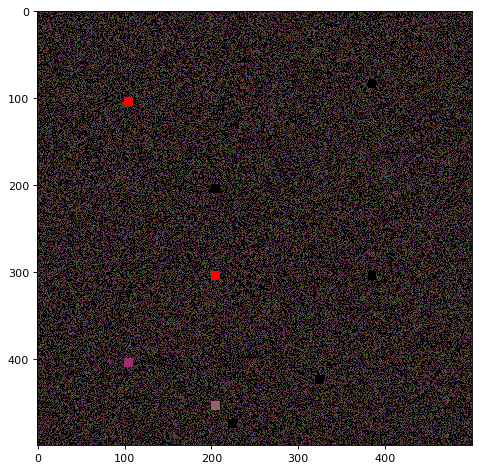

In [18]:
# Odfiltrowanie tylko kolorów bliskich czerwonemu

red_filtered = (im[:,:,0] > 50) & (im[:,:,1] < 150) & (im[:,:,2] < 150)
plt.figure(num=None, figsize=(8, 6), dpi=80)
im_new = im.copy()
im_new[:, :, 0] = im_new[:, :, 0] * red_filtered
im_new[:, :, 1] = im_new[:, :, 1] * red_filtered
im_new[:, :, 2] = im_new[:, :, 2] * red_filtered
imshow(im_new);

## 3.3. Wycięcie wycinka obrazka

In [25]:
from PIL import Image

im = Image.open('random_dots.png')
print(type(im))
print(im.size)

# Wycięcie wycinka nr 1
im_crop = im.crop((0, 0, 50, 50))
im_crop.save('wycinek-tlo.png', quality=100)

<class 'PIL.PngImagePlugin.PngImageFile'>
(500, 500)


## 3.4. Histogramy wycinka RGB

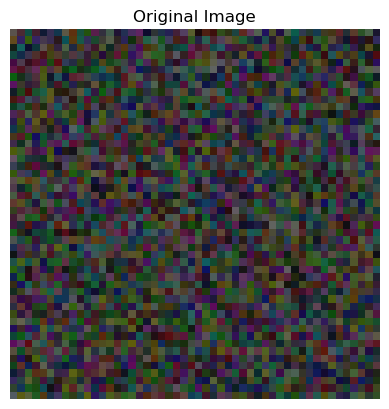

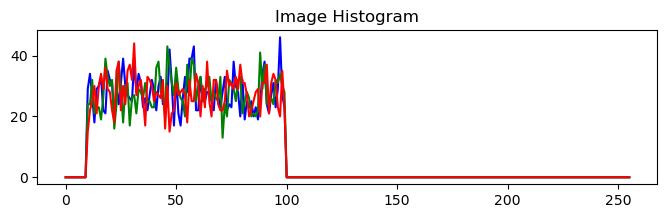

In [26]:
# Histogramy wycinka

import cv2 
import matplotlib.pyplot as plt 


# load image 
imageObj = cv2.imread('wycinek-tlo.png') 
#When we read the image using cv2.imread() method, the image read is in BGR format


# to avoid grid lines 
plt.axis("off") 
plt.title("Original Image") 
plt.imshow(cv2.cvtColor(imageObj, cv2.COLOR_BGR2RGB)) 
plt.show() 

# Get BGR data from image 
blue_color = cv2.calcHist([imageObj], [0], None, [256], [0, 256]) 
green_color = cv2.calcHist([imageObj], [1], None, [256], [0, 256]) 
red_color = cv2.calcHist([imageObj], [2], None, [256], [0, 256]) 


plt.figure(num=None, figsize=(8, 2))
plt.plot(blue_color, color='b') 
plt.plot(green_color, color='g') 
plt.plot(red_color, color='r') 
plt.title('Image Histogram') 
plt.show()


In [27]:
histogram_rgb = np.array([red_color, green_color, blue_color])
print("Data type:", type(histogram_rgb))
print("Data size:", (histogram_rgb.size))
print("Data shape:", (histogram_rgb.shape))

Data type: <class 'numpy.ndarray'>
Data size: 768
Data shape: (3, 256, 1)


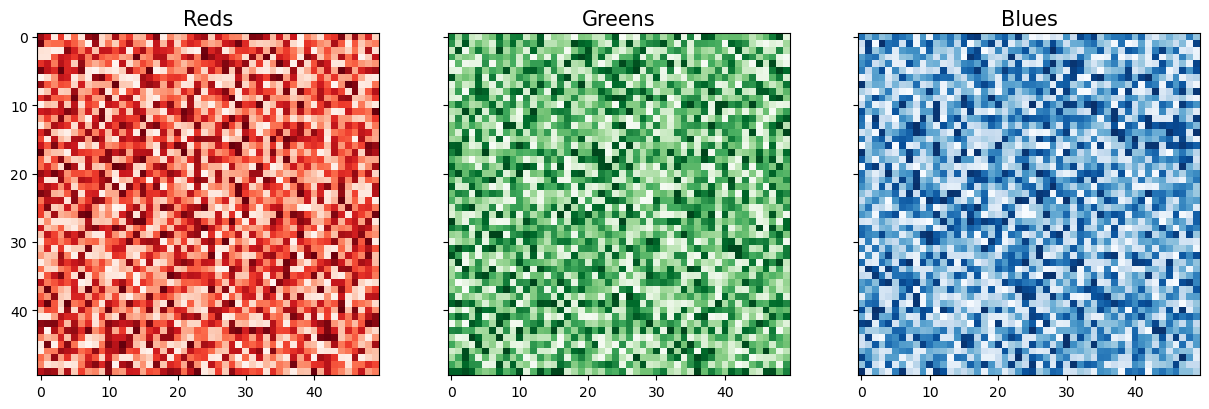

In [28]:
def rgb_splitter(image):
    rgb_list = ['Reds','Greens','Blues']
    fig, ax = plt.subplots(1, 3, figsize=(15,5), sharey = True)
    for i in range(3):
        ax[i].imshow(image[:,:,i], cmap = rgb_list[i])
        ax[i].set_title(rgb_list[i], fontsize = 15)

imRGB = cv2.cvtColor(imageObj, cv2.COLOR_BGR2RGB)        
rgb_splitter(imRGB)

## 3.5. Mediana i średnia pixeli wycinka

In [29]:
# Mediana kolorów RGB

median_r = np.median(imRGB[:,:,0])
median_g = np.median(imRGB[:,:,1])
median_b = np.median(imRGB[:,:,2])

print('Median (RGB) =',(median_r, median_g, median_b))


# Średnia kolorów RGB

mean_r = np.mean(imRGB[:,:,0])
mean_g = np.mean(imRGB[:,:,1])
mean_b = np.mean(imRGB[:,:,2])

print('Mean (RGB) =',(mean_r, mean_g, mean_b))


Median (RGB) = (55.0, 55.0, 54.0)
Mean (RGB) = (54.5552, 54.8316, 53.992)


 ---

## 3.6. Wycinek nr 2

In [1]:
from PIL import Image

im = Image.open('random_dots.png')
print(type(im))
print(im.size)

# Wycięcie wycinka nr 2
im_crop = im.crop((100, 400, 150, 450))
im_crop.save('wycinek-pink.png', quality=100)

<class 'PIL.PngImagePlugin.PngImageFile'>
(500, 500)


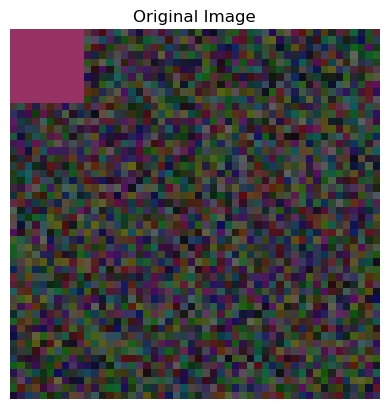

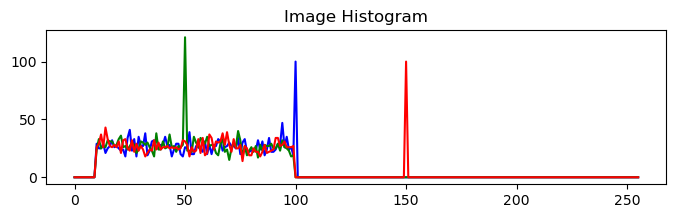

In [33]:
# Histogramy wycinka nr2
import cv2 
import matplotlib.pyplot as plt 


# load image 
im = cv2.imread('wycinek-pink.png') 
#When we read the image using cv2.imread() method, the image read is in BGR format


# to avoid grid lines 
plt.axis("off") 
plt.title("Original Image") 
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)) 
plt.show() 

# Get BGR data from image 
blue_color2 = cv2.calcHist([im], [0], None, [256], [0, 256]) 
green_color2 = cv2.calcHist([im], [1], None, [256], [0, 256]) 
red_color2 = cv2.calcHist([im], [2], None, [256], [0, 256]) 


plt.figure(num=None, figsize=(8, 2))
plt.plot(blue_color2, color='b') 
plt.plot(green_color2, color='g') 
plt.plot(red_color2, color='r') 
plt.title('Image Histogram') 
plt.show()


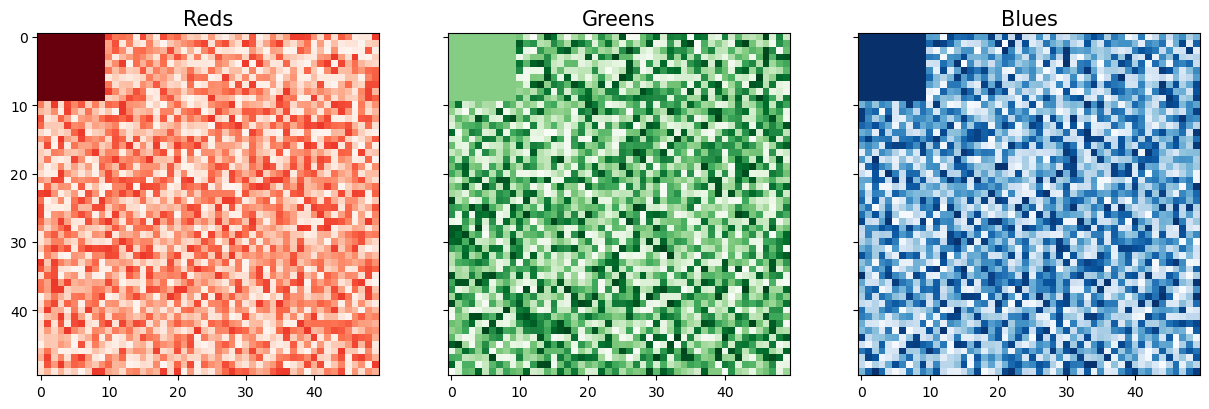

In [34]:
def rgb_splitter(image):
    rgb_list = ['Reds','Greens','Blues']
    fig, ax = plt.subplots(1, 3, figsize=(15,5), sharey = True)
    for i in range(3):
        ax[i].imshow(image[:,:,i], cmap = rgb_list[i])
        ax[i].set_title(rgb_list[i], fontsize = 15)

imRGB = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)        
rgb_splitter(imRGB)

Znaleziono 100 pixeli spełniających warunek.


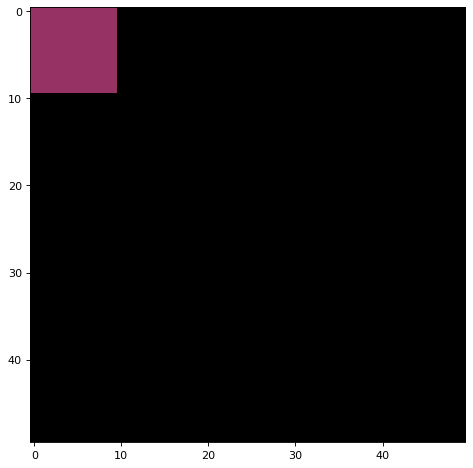

In [35]:
# Odfiltrowanie konkretnego koloru RGB=(150,50,100)

filtered = (imRGB[:,:,0] == 150) & (imRGB[:,:,1] == 50) & (imRGB[:,:,2] == 100)
plt.figure(num=None, figsize=(6, 6), dpi=80)
im_new = imRGB.copy()
im_new[:, :, 0] = im_new[:, :, 0] * filtered
im_new[:, :, 1] = im_new[:, :, 1] * filtered
im_new[:, :, 2] = im_new[:, :, 2] * filtered
imshow(im_new);


ile = (filtered>0).sum()
if (ile>0):
    print('Znaleziono',str(ile),'pixeli spełniających warunek.')

In [36]:
# Mediana kolorów RGB

median_r = np.median(imRGB[:,:,0])
median_g = np.median(imRGB[:,:,1])
median_b = np.median(imRGB[:,:,2])

print('Mediana (RGB) =',(median_r, median_g, median_b))


# Średnia kolorów RGB

mean_r = np.mean(imRGB[:,:,0])
mean_g = np.mean(imRGB[:,:,1])
mean_b = np.mean(imRGB[:,:,2])

print('Mean (RGB) =',(mean_r, mean_g, mean_b))


Mediana (RGB) = (56.0, 51.0, 56.0)
Mean (RGB) = (57.6248, 53.2004, 56.2996)


In [37]:
# ----------------------------------------------------------------------
# ZAD. Ile wynosi mediana i średnia pixeli dla całego obrazka?
# ----------------------------------------------------------------------